# Film yorumlarını sınıflandırmak : binary (ikili) sınıflandırma

Film yorumlarını iki sınıf üzerinden (pozitif - negatif) sınıflandıracağız.

In [1]:
# The IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num words, en sık geçen 10000 kelimeyi içeren verileri yükler.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_data[0]
# kelimeler yerine sayılar görüyoruz.
# veri setinde her kelimenin bir sayı karşılığı var
# bu sayısal da o kelimelerin indislerini veriyor.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]
# negatif: 0 - pozitif: 1
# eğitim veri setindeki ilk yorum pozitifmiş

np.int64(1)

In [6]:
# 10000 kelime ile kendimi sınırlamıştık
max([max(sequence) for sequence in train_data])


9999

In [9]:
# sayıları tekrardan kelimelere dönüştürme

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# ilk 3 indisi (0: padding, 1: start of sequence, 2: unknown) veri seti kendi aldığı için
# her sayının indisinden 3 çıkarıyoruz

In [10]:
word_index["the"]

1

In [14]:
# ilk örnekteki ikinci sayımız 14'tü fakat bundan üç çıkarmamız gerekiyor
reverse_word_index[14-3]

'this'

Girişteki tensorumuzun sabit uzunlukta olmasını istiyoruz. Çünkü bazı yorumlar 10 farklı kelimeden oluşuyor, bazıları 100 farklı kelimeden oluşuyor. Bunların boyutlarının aynı olmasını istiyoruz. Bunu da `multi-hot encoding` ile yapıyoruz.

Elimizde 10000 farklı kelime var toplamda. Tensorların boyutu 10000 olacak.
* Bu 10.000 kelimedeki kelimelerden hangileri bizim yorumumuzda varsa onların indisleri 1 olarak işaretlenecek, olmayanlar 0 olarak işaretlenecek.

Böylelikle 100 farklı kelime olan yorumun tensorunda 100 adet 1, 10.000-100 kadar da sıfır olacak.

Benzer şekilde 10 farklı kelime olan yorumun tensorunde 10 adet 1, 10.000 - 10 adet sıfır bulunacak.

Böylelikle tensorların boyutları eşitlendi

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # len(sequences) : toplam yorum sayısı
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Yukarıdaki kodda for döngüsünde tüm yorumlar teker teker geziliyor. i, bizim yorum indeksimiz

i = 0 için
* 1. yorumdaki kelimelerin indeksleri [1,14,20] alınıyor
* result[0, 1],result[0,14], result[1,20] 1 yapılıyor
böylelikle ilk yorum için 3 adet bir oluşturuldu diğerleri sıfır

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
# aynı şekilde etiketlerimizi de vektörize etmemiz gerekiyor
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Modeli inşa etmek
Artık giriş verilerimizi sinir ağına girebilecek şekilde vektörize ettik. Girişlerimiz vektör, etiketlerimiz ise skalar (0-1).

Bu problem için dense katmanı ve relu aktivasyon fonksiyonu kullanacağız.

Dense için karar vermemiz gereken 2 şey var. Bunlar:
- kaç katman (layer) kullanacağız
- her katmanda kaç tane unit kullanacağız


Bunun detayları 5. bölümde

Şimdilik biz 2 adet 16 unit'lik katman kullanacağız.

üçüncü ve son katman ise bizim çıkış katmanımız olacak ve bize pozitif (1) ya da negatif (0) sonucunu verecek


In [22]:
# klasik model formatı

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16 unit olması, 16 adet ağırlık (w) olması anlamına geliyor.
# w_shape = (input_dimension, 16)

Modelimizi oluşturduk, bir sonraki adım ise loss fonksiyonu ve optimizer seçmek.

Binary classification yaptığımız için en uygun olan
- loss fonksiyonu: `binary_crossentropy` ya da `mean_squared_error`. Fakat crossentropy çok daha iyi.
- optimizer için ise `rmsprop`


metric olarak ise doğruluğu `accuracy` alıyoruz.

In [23]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validation verilerinin hazırlanması

In [29]:
print(x_train.shape)

x_val = x_train[:10000]
print(x_train[:10000].shape)

partial_x_train = x_train[10000:]
print(x_train[10000:].shape)

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(25000, 10000)
(10000, 10000)
(15000, 10000)


In [30]:
# eğitimde 20 epochs kullanacağız. toplamda 20 kez eğitim olacak,
# her bir eğitimde ise batch_size olarak 512 kullanacağız
# 20 * 512 = 10240

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6857 - loss: 0.5982 - val_accuracy: 0.8691 - val_loss: 0.3790
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8941 - loss: 0.3274 - val_accuracy: 0.8490 - val_loss: 0.3483
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9176 - loss: 0.2446 - val_accuracy: 0.8891 - val_loss: 0.2788
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9415 - loss: 0.1865 - val_accuracy: 0.8736 - val_loss: 0.3132
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9459 - loss: 0.1600 - val_accuracy: 0.8855 - val_loss: 0.2802
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9602 - loss: 0.1297 - val_accuracy: 0.8803 - val_loss: 0.3091
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9665 - loss: 0.1140 - val_accuracy: 0.8832 - val_loss: 0.3098
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9729 - loss: 0.0990 - val_accuracy: 0.8799 - 

In [31]:
history_dict = history.history # eğitim geçmişini tutmak
history_dict.keys() # history dict olarak kaydedildiğin için anahtar:değer (key:value) olarak çalışıyor. hangi anahtarlar var?


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

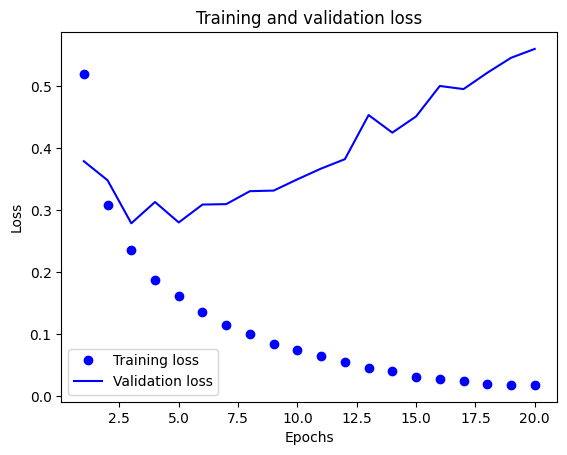

In [36]:
# eğitim ve geçerleme (validation) kayıplarının (loss) grafiğe dökülmesi

import matplotlib.pyplot as plt
# history_dict = history.history # yukarıda yapmıştık
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss") # bo: blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # b: solid blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




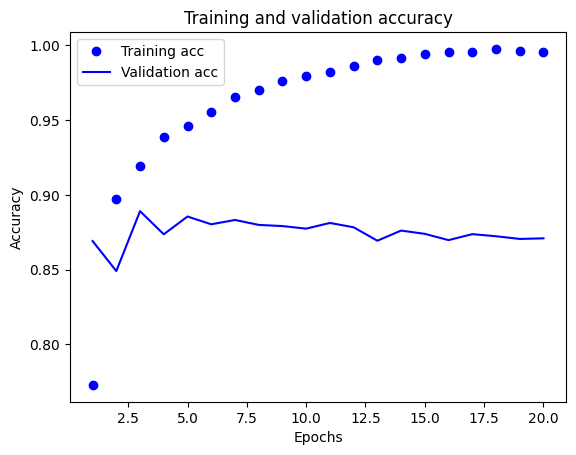

In [39]:
# eğitim ve geçerleme doğruluğu

plt.clf() # figürü temizle

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Grafiklere baktığımızda validation ve eğitim arasında çok fazla fark olduğunu görüyoruz. Bu modelin artık eğitim verilerini ezberlediğini, ilk kez gördüğü validation veri setinde ise afalladığını gösteriyor: `OVERFITTING`.


Modelin kötüye gittiği nokta olarak epoch'un 4 olduğu noktayı alabiliriz. Bu sebeple epochs=4 alarak modeli tekrardan eğitelim.

In [40]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6448 - loss: 0.6177
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8891 - loss: 0.3589
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9150 - loss: 0.2523
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9294 - loss: 0.2051
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8854 - loss: 0.2871


In [42]:
results # loss: 0.29 - acc: 0.89

# fakat %89 yeterli değil, %95'e olabildiğince yaklaşmayı isteriz.



[0.28588661551475525, 0.8870400190353394]

# eğitilmiş model ile yeni veriler üzerinde tahminlerde bulunma

In [43]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.21798524],
       [0.99993783],
       [0.86166596],
       ...,
       [0.12418988],
       [0.10897428],
       [0.47421545]], dtype=float32)

Görüldüğü üzere tahminlerinde 0.99993783 gibi çok yüksek oranda emin olduğu tahminler varken daha az emin olduğu 0.47421545 gibi tahminleri de var.

**TODO**:
- 2 katman kullandık. Bunu 1 ve 3 katman ile dene
- Her katmana daha fazla ya da daha az units ekle: 32, 64...
- loss fonksiyon olarak binary_crossentropy yerine mse koy
- relu yerine tanh kullan

ve loss'un, accuracy'nin nasıl değiştiğine bak (tablo haline getirilebilir)

